In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = "#FFE5B4"

In [5]:
data = pd.read_csv('Happiness_report.csv')

In [6]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
data_columns = ['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom',
               'Trust (Government Corruption)','Generosity','Dystopia Residual']

In [14]:
data = data [data_columns].copy()

In [12]:
happy_df = data.rename({'Country':'country','Region':'region','Happiness Rank':'happiness_rank','Happiness Score':'happiness_score','Standard Error':'standard_error','Economy (GDP per Capita)':'economy',
          'Family':'family','Health (Life Expectancy)':'life_expectancy','Freedom':'freedom','Trust (Government Corruption)':'trust','Generosity':'generosity','Dystopia Residual':'dystopia_residual'},axis=1)

In [13]:
happy_df.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,life_expectancy,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
happy_df.isnull().sum()

country              0
region               0
happiness_rank       0
happiness_score      0
standard_error       0
economy              0
family               0
life_expectancy      0
freedom              0
trust                0
generosity           0
dystopia_residual    0
dtype: int64

Text(0, 0.5, 'Economy')

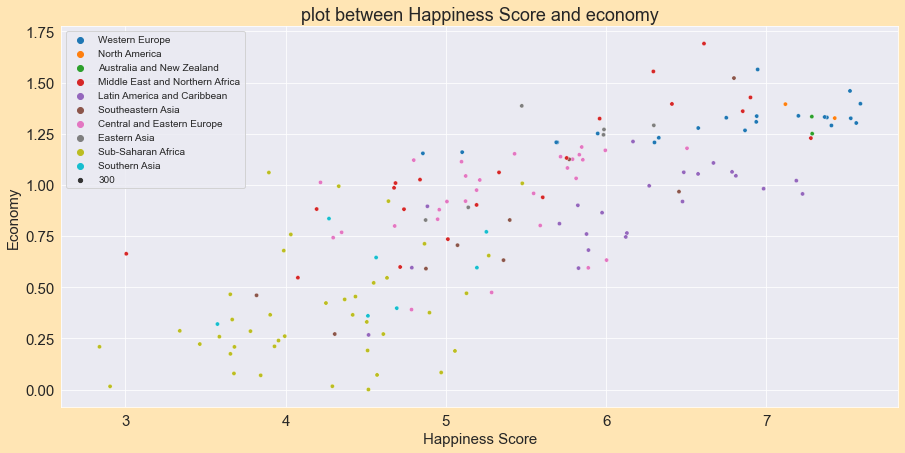

In [25]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('plot between Happiness Score and economy')
sns.scatterplot(x = happy_df.happiness_score,y = happy_df.economy,hue=happy_df.region,size=300);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Economy')

In [27]:
economy_region = happy_df.groupby('region')['economy'].sum()
economy_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy, dtype: float64

Text(0, 0.5, ' ')

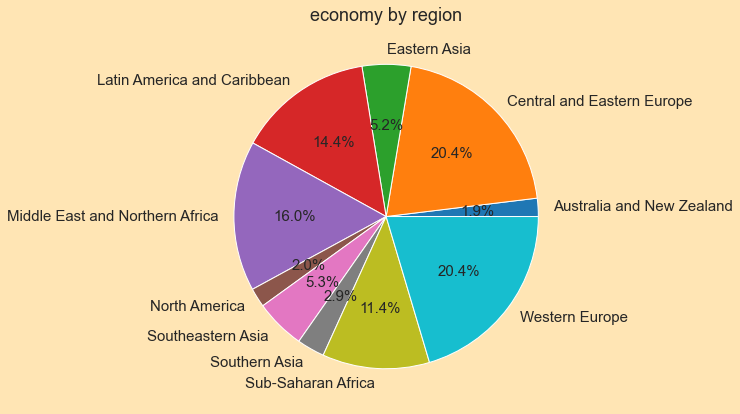

In [28]:
economy_region.plot.pie(autopct = '%1.1f%%')
plt.title('economy by region')
plt.ylabel(' ')

In [30]:
total_country = happy_df.groupby('region')[['country']].count()
total_country

,country
region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


C:\Users\PINKI\AppData\Local\Temp\ipykernel_8420\57829707.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),


<AxesSubplot:>

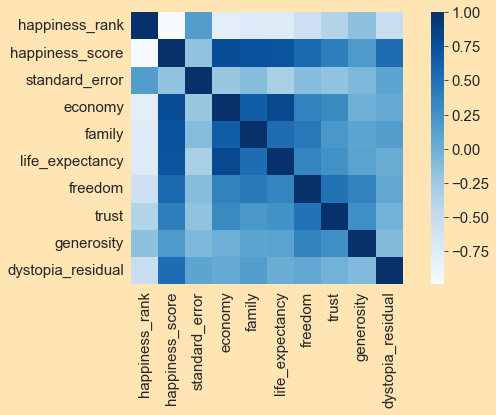

In [33]:
cor = happy_df.corr(method='pearson')
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
            cmap="Blues",square=True,ax=ax)

In [34]:
trust_corruption = happy_df.groupby('region')[['trust']].mean()
trust_corruption

,trust
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

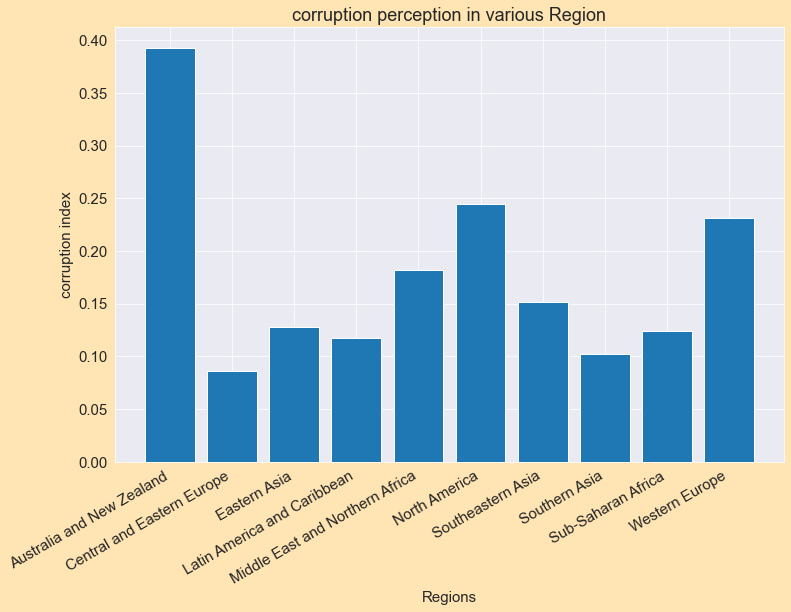

In [40]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('corruption perception in various Region')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('corruption index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(trust_corruption.index,trust_corruption.trust)

In [44]:
top_10 = happy_df.head(10)


In [45]:
bottom_10 = happy_df.tail(10)
